In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os, sys
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import utils
from pathlib import Path

sys.path.append("../../../analysisTools/")
import plotTools as ptools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
def add_signal_info_to_df(df):
    m1_list = []
    delta_list = []
    ctau_list = []
    
    for point in df.index.values:
        sig_dict = ptools.signalPoint(point)
        m1_list.append(sig_dict['m1'])
        delta_list.append(sig_dict['delta'])
        ctau_list.append(sig_dict['ctau'])
    
    df['m1'] = m1_list
    df['delta'] = delta_list
    df['ctau'] = ctau_list
    
    df = df.sort_values(by=['m1']) # sort by m1

    return df

In [6]:
def save_df_to_csv(df, outdir, outname, isSignal = False):
    Path(outdir).mkdir(parents=True, exist_ok=True)

    if isSignal:
        df = add_signal_info_to_df(df)
    
    df.to_csv(f'{outdir}/{outname}.csv')

    print(f'Saved: {outdir}/{outname}.csv')

## Background

In [7]:
prefix = './coffea/skimmed/'
suffix = '_SR_BDT_BestVertex'

In [8]:
# Background
bkg_files = {
    "QCD": "bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "bkg_2018_Top",
    "DY": "bkg_2018_DY",
    "Diboson": "bkg_2018_Diboson",
    "Triboson": "bkg_2018_Triboson",
    "W+jets": "bkg_2018_WJets",
    "Z+jets": "bkg_2018_ZJets",
}

bkg_histos = {}

for b in bkg_files.keys():
    bkg_histos[b] = util.load(f'{prefix}/{bkg_files[b]}{suffix}.coffea')[0]

In [9]:
# efficiency
pd.options.display.float_format = '{:,.6f}'.format
bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histos, 'cutflow')

bkg_eff_df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
QCD,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Top,0.000129,0.000013,0.000013,0.000008,0.000007,0.000007,0.000007,0.000007,0.000000
DY,0.000011,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000000
Diboson,0.000637,0.000044,0.000044,0.000033,0.000031,0.000030,0.000030,0.000027,0.000000
Triboson,0.001933,0.000158,0.000158,0.000104,0.000092,0.000091,0.000091,0.000076,0.000000
W+jets,0.002310,0.000173,0.000173,0.000139,0.000132,0.000131,0.000131,0.000114,0.000000
Z+jets,0.006645,0.000398,0.000398,0.000325,0.000310,0.000309,0.000309,0.000292,0.000000
Total,0.000019,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


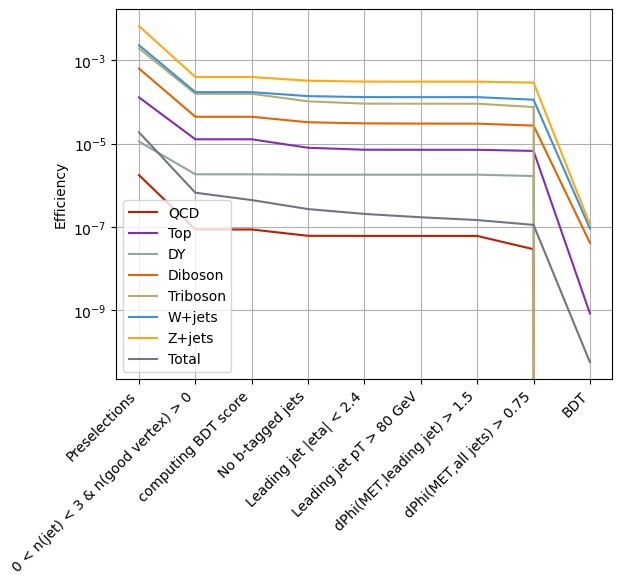

In [17]:
utils.plot_bkg_efficiency(bkg_histos, bkg_eff_df, ylabel='Efficiency')

In [13]:
outdir = './csv/Cutflow/Efficiency/'
outname = f'SR_BDT_Background_Efficiency'

df_to_save = bkg_eff_df

save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/Efficiency//SR_BDT_Background_Efficiency.csv


In [14]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histos, 'cutflow_cts')

bkg_cts_df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
QCD,"38,039.83","1,882.67","1,882.67","1,326.86","1,319.01","1,319.01","1,318.41",632.25,0.00
Top,"5,667.49",559.22,559.22,349.76,314.03,312.99,312.95,294.00,0.04
DY,"14,495.72","2,373.75","2,373.75","2,325.57","2,325.57","2,325.57","2,325.57","2,157.97",0.00
Diboson,"4,424.20",307.91,307.91,227.24,213.36,211.27,210.33,189.35,0.29
Triboson,53.00,4.32,4.32,2.85,2.51,2.51,2.50,2.09,0.00
W+jets,"227,212.60","17,009.81","17,009.81","13,645.63","12,937.21","12,911.49","12,907.15","11,204.39",9.04
Z+jets,"142,220.15","8,524.55","8,524.55","6,957.67","6,625.48","6,613.11","6,612.30","6,256.76",2.48
Total,"432,113.00","30,662.23","30,662.23","24,835.58","23,737.17","23,695.95","23,689.22","20,736.81",11.85


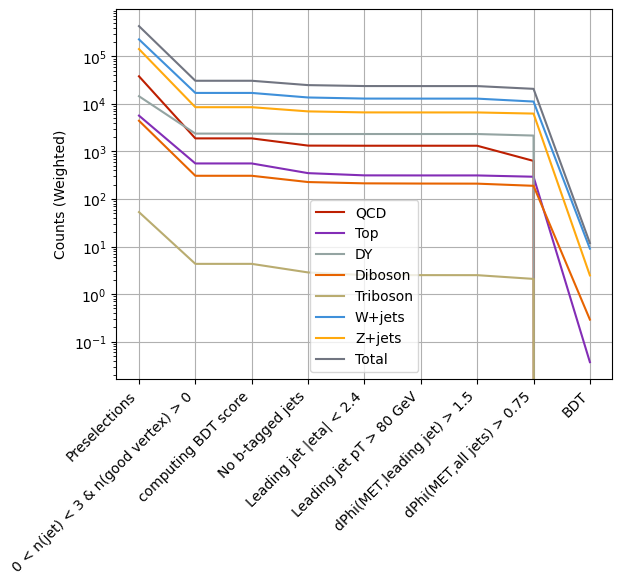

In [18]:
utils.plot_bkg_efficiency(bkg_histos, bkg_cts_df, ylabel='Counts (Weighted)')

In [19]:
outdir = './csv/Cutflow/EventCount_Weighted/'
outname = f'SR_BDT_Background_EventCount_Weighted'

df_to_save = bkg_cts_df

save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/EventCount_Weighted//SR_BDT_Background_EventCount_Weighted.csv


In [20]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histos, 'cutflow_nevts')

bkg_cts_raw_df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
QCD,12311,381,381,160,159,159,158,3,0
Top,49818,4688,4688,3058,2348,2337,2336,2006,1
DY,205,14,14,12,12,12,12,10,0
Diboson,18067,1234,1234,915,860,852,848,767,1
Triboson,2257,170,170,116,106,105,104,92,0
W+jets,697657,48425,48425,37015,35472,35415,35377,29090,30
Z+jets,1281459,67427,67427,52627,50986,50934,50903,44480,19
Total,2061774,122339,122339,93903,89943,89814,89738,76448,51


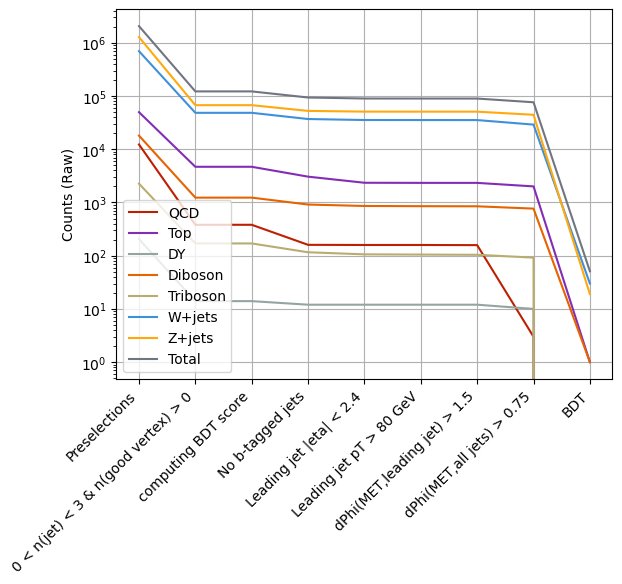

In [22]:
utils.plot_bkg_efficiency(bkg_histos, bkg_cts_raw_df, ylabel='Counts (Raw)')

In [23]:
outdir = './csv/Cutflow/EventCount_Raw/'
outname = f'SR_BDT_Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/EventCount_Raw//SR_BDT_Background_EventCount_Raw.csv


In [24]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 11.85


In [25]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df['BDT']).transpose(), pd.DataFrame(bkg_cts_raw_df['BDT']).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,QCD,Top,DY,Diboson,Triboson,W+jets,Z+jets,Total
Weighted Counts,0.00,0.04,0.00,0.29,0.00,9.04,2.48,11.85
Raw Counts,0.00,1.00,0.00,1.00,0.00,30.00,19.00,51.00


## Signal

In [26]:
# Signal
sig_histo = util.load(f'{prefix}/signal{suffix}.coffea')[0]

In [27]:
si = utils.get_signal_point_dict(sig_histo)

pd.options.display.float_format = '{:,.1f}'.format
si

,mchi,dmchi,ctau,m1,m2,delta,name
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,99.0,18.0,100.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-100
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,94.5,9.0,100.0,90.0,99.0,0.1,sig_2018_Mchi-94p5_dMchi-9p0_ctau-100
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,99.0,18.0,1.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-1
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,99.0,18.0,10.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-10
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,88.0,16.0,10.0,80.0,96.0,0.2,sig_2018_Mchi-88p0_dMchi-16p0_ctau-10
...,...,...,...,...,...,...,...
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,10.5,1.0,10.0,10.0,11.0,0.1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-10
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.5,1.0,1.0,10.0,11.0,0.1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-1
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,105.0,10.0,100.0,100.0,110.0,0.1,sig_2018_Mchi-105p0_dMchi-10p0_ctau-100
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,105.0,10.0,10.0,100.0,110.0,0.1,sig_2018_Mchi-105p0_dMchi-10p0_ctau-10


In [28]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)

cutnames

['Preselections',
 '0 < n(jet) < 3 & n(good vertex) > 0',
 'computing BDT score',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75',
 'BDT']

### Efficiency

In [50]:
pd.options.display.float_format = '{:,.6f}'.format

In [75]:
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [66]:
table = eff_cutflow

In [70]:
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,0.065041,0.015343,0.015343,0.012976,0.012527,0.012527,0.012527,0.012353,0.004828
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,0.066110,0.013011,0.013011,0.011131,0.010744,0.010743,0.010743,0.010641,0.003846
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,0.058112,0.011195,0.011195,0.009729,0.009420,0.009420,0.009420,0.009342,0.003253
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,0.049041,0.011230,0.011230,0.009552,0.009201,0.009201,0.009201,0.009076,0.004004
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,0.051428,0.009301,0.009301,0.007902,0.007672,0.007672,0.007672,0.007581,0.002635
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,0.043559,0.007791,0.007791,0.006622,0.006351,0.006351,0.006351,0.006279,0.002089
sig_2018_Mchi-60p0_dMchi-20p0_ctau-1,0.029875,0.007027,0.007027,0.005808,0.005631,0.005631,0.005631,0.005523,0.002654
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,0.014484,0.001842,0.001842,0.001519,0.001421,0.001418,0.001418,0.001404,0.000377
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,0.014782,0.002143,0.002143,0.001894,0.001811,0.001811,0.001811,0.001794,0.000187
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,0.033826,0.006982,0.006982,0.005961,0.005695,0.005695,0.005695,0.005651,0.002982


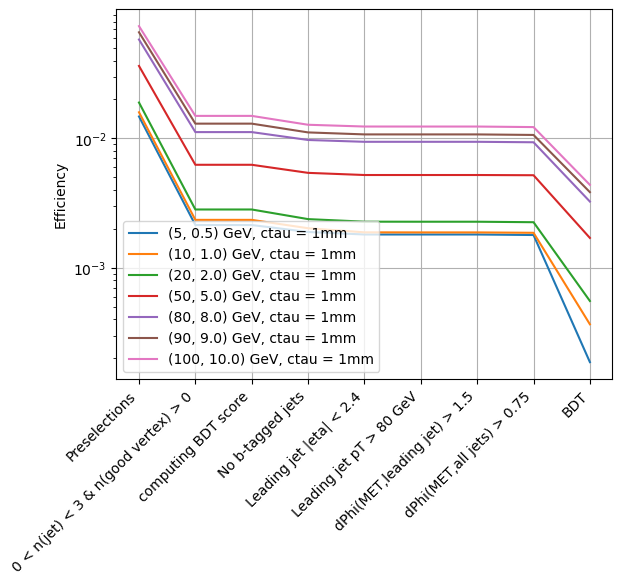

In [126]:
m1s = [5, 10, 20, 50, 80, 90, 100]
deltas = [0.1]
ctaus = [1]

utils.plot_signal_efficiency(sig_histo, eff_cutflow, m1s, deltas, ctaus, ylabel = 'Efficiency')

In [81]:
outdir = './csv/Cutflow/Efficiency/'
outname = f'SR_BDT_Signal_ctau-{int(ct)}_samples_Efficiency'

df_to_save = df

save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_BDT_Signal_ctau-1_samples_Efficiency.csv


In [82]:
ct = 10.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,0.060097,0.011533,0.011533,0.009790,0.009461,0.009457,0.009457,0.009230,0.004427
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,0.051928,0.009921,0.009921,0.008256,0.008034,0.008034,0.008034,0.007820,0.004083
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,0.058330,0.009363,0.009363,0.007922,0.007656,0.007656,0.007656,0.007545,0.003211
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,0.052317,0.008360,0.008360,0.007155,0.006897,0.006897,0.006897,0.006840,0.002736
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,0.045542,0.008151,0.008151,0.006929,0.006680,0.006676,0.006676,0.006519,0.003072
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,0.045232,0.006990,0.006990,0.006015,0.005827,0.005827,0.005827,0.005734,0.002399
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,0.039166,0.005699,0.005699,0.004893,0.004680,0.004676,0.004676,0.004619,0.001771
sig_2018_Mchi-60p0_dMchi-20p0_ctau-10,0.028663,0.005058,0.005058,0.004260,0.004136,0.004136,0.004136,0.003913,0.002065
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,0.010930,0.001187,0.001187,0.000987,0.000935,0.000931,0.000931,0.000876,0.000197
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,0.010676,0.001022,0.001022,0.000847,0.000792,0.000792,0.000792,0.000771,0.000098


In [83]:
outdir = './csv/Cutflow/Efficiency/'
outname = f'SR_BDT_Signal_ctau-{int(ct)}_samples_Efficiency'

df_to_save = df

save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_BDT_Signal_ctau-10_samples_Efficiency.csv


In [84]:
ct = 100.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,0.042898,0.005171,0.005171,0.004361,0.004208,0.004206,0.004206,0.004008,0.001284
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,0.041559,0.004565,0.004565,0.003872,0.003775,0.003775,0.003775,0.003670,0.001014
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,0.038143,0.004461,0.004461,0.003821,0.003680,0.003677,0.003677,0.003497,0.001151
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,0.036959,0.004105,0.004105,0.003461,0.003353,0.003349,0.003349,0.003245,0.000880
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,0.032554,0.003600,0.003600,0.003015,0.002870,0.002870,0.002870,0.002746,0.000841
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,0.032810,0.003467,0.003467,0.002935,0.002837,0.002837,0.002837,0.002743,0.000667
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,0.027190,0.002624,0.002624,0.002212,0.002100,0.002100,0.002100,0.002042,0.000500
sig_2018_Mchi-60p0_dMchi-20p0_ctau-100,0.021028,0.002322,0.002322,0.001971,0.001921,0.001921,0.001921,0.001762,0.000555
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,0.007414,0.000647,0.000647,0.000562,0.000528,0.000528,0.000528,0.000501,0.000044
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,0.007306,0.000596,0.000596,0.000504,0.000475,0.000475,0.000475,0.000457,0.000019


In [85]:
outdir = './csv/Cutflow/Efficiency/'
outname = f'SR_BDT_Signal_ctau-{int(ct)}_samples_Efficiency'

df_to_save = df

save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_BDT_Signal_ctau-100_samples_Efficiency.csv


### Weighted Event count

In [86]:
pd.options.display.float_format = '{:,.2f}'.format

In [87]:
count_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [89]:
table = count_cutflow

In [90]:
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
#df.loc["Total"] = df.sum()

df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,51.58,12.17,12.17,10.29,9.93,9.93,9.93,9.80,3.83
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,627.11",320.24,320.24,273.97,264.43,264.40,264.40,261.91,94.66
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"2,122.81",408.93,408.93,355.40,344.10,344.10,344.10,341.27,118.85
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,90.58,20.74,20.74,17.64,16.99,16.99,16.99,16.76,7.39
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"2,928.06",529.56,529.56,449.92,436.79,436.79,436.79,431.62,150.05
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"4,153.77",742.93,742.93,631.48,605.60,605.60,605.60,598.76,199.21
sig_2018_Mchi-60p0_dMchi-20p0_ctau-1,5.68,1.33,1.33,1.10,1.07,1.07,1.07,1.05,0.50
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"2,748.24",349.57,349.57,288.31,269.62,268.98,268.98,266.40,71.63
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"62,382.76","9,045.04","9,045.04","7,993.01","7,642.38","7,642.38","7,642.38","7,572.31",789.21
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,205.19,42.35,42.35,36.16,34.55,34.55,34.55,34.28,18.09


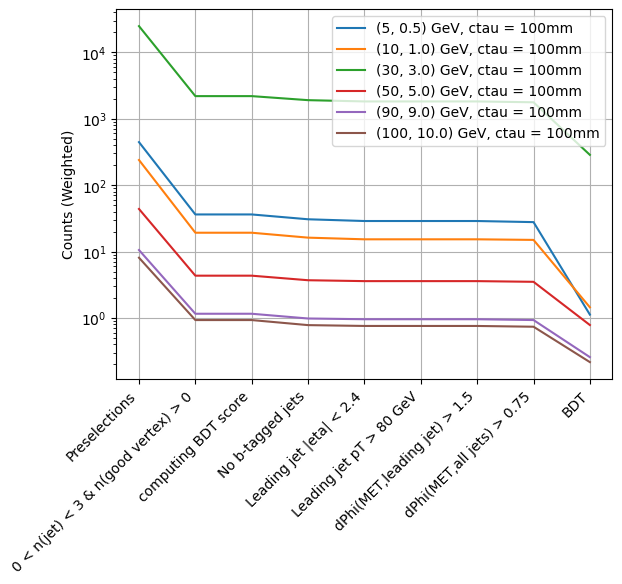

In [133]:
m1s = [5, 10, 30, 50, 90, 100]
deltas = [0.1]
ctaus = [100]

utils.plot_signal_efficiency(sig_histo, count_cutflow, m1s, deltas, ctaus, ylabel = 'Counts (Weighted)')

In [94]:
outdir = './csv/Cutflow/EventCount_Weighted/'
outname = f'SR_BDT_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'

df_to_save = df

save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/EventCount_Weighted//SR_BDT_Signal_ctau-1_samples_EventCount_Weighted.csv


In [95]:
# without m1 = 30 GeV
m1 = 30.0

points = (si["ctau"] == ct) & (si["m1"] != m1)

df = table.loc[list(si[points].name)]
df.loc["Total"] = df.sum()

df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,51.58,12.17,12.17,10.29,9.93,9.93,9.93,9.80,3.83
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,627.11",320.24,320.24,273.97,264.43,264.40,264.40,261.91,94.66
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"2,122.81",408.93,408.93,355.40,344.10,344.10,344.10,341.27,118.85
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,90.58,20.74,20.74,17.64,16.99,16.99,16.99,16.76,7.39
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"2,928.06",529.56,529.56,449.92,436.79,436.79,436.79,431.62,150.05
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"4,153.77",742.93,742.93,631.48,605.60,605.60,605.60,598.76,199.21
sig_2018_Mchi-60p0_dMchi-20p0_ctau-1,5.68,1.33,1.33,1.10,1.07,1.07,1.07,1.05,0.50
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"2,748.24",349.57,349.57,288.31,269.62,268.98,268.98,266.40,71.63
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"62,382.76","9,045.04","9,045.04","7,993.01","7,642.38","7,642.38","7,642.38","7,572.31",789.21
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,205.19,42.35,42.35,36.16,34.55,34.55,34.55,34.28,18.09


In [96]:
ct = 10.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
#df.loc["Total"] = df.sum()

df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,4.78,0.92,0.92,0.78,0.75,0.75,0.75,0.73,0.35
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,6.15,1.17,1.17,0.98,0.95,0.95,0.95,0.93,0.48
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,147.91,23.74,23.74,20.09,19.41,19.41,19.41,19.13,8.14
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,197.37,31.54,31.54,26.99,26.02,26.02,26.02,25.80,10.32
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,8.45,1.51,1.51,1.29,1.24,1.24,1.24,1.21,0.57
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,267.87,41.40,41.40,35.62,34.51,34.51,34.51,33.96,14.21
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,390.29,56.79,56.79,48.76,46.63,46.60,46.60,46.02,17.65
sig_2018_Mchi-60p0_dMchi-20p0_ctau-10,0.55,0.10,0.10,0.08,0.08,0.08,0.08,0.07,0.04
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,211.62,22.98,22.98,19.10,18.10,18.03,18.03,16.97,3.81
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,"6,090.24",583.27,583.27,483.38,451.73,451.73,451.73,439.55,56.01


In [97]:
outdir = './csv/Cutflow/EventCount_Weighted/'
outname = f'SR_BDT_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'

df_to_save = df

save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/EventCount_Weighted//SR_BDT_Signal_ctau-10_samples_EventCount_Weighted.csv


In [98]:
# without m1 = 30 GeV
m1 = 30.0

points = (si["ctau"] == ct) & (si["m1"] != m1)

df = table.loc[list(si[points].name)]
df.loc["Total"] = df.sum()

df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,4.78,0.92,0.92,0.78,0.75,0.75,0.75,0.73,0.35
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,6.15,1.17,1.17,0.98,0.95,0.95,0.95,0.93,0.48
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,147.91,23.74,23.74,20.09,19.41,19.41,19.41,19.13,8.14
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,197.37,31.54,31.54,26.99,26.02,26.02,26.02,25.80,10.32
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,8.45,1.51,1.51,1.29,1.24,1.24,1.24,1.21,0.57
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,267.87,41.40,41.40,35.62,34.51,34.51,34.51,33.96,14.21
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,390.29,56.79,56.79,48.76,46.63,46.60,46.60,46.02,17.65
sig_2018_Mchi-60p0_dMchi-20p0_ctau-10,0.55,0.10,0.10,0.08,0.08,0.08,0.08,0.07,0.04
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,211.62,22.98,22.98,19.10,18.10,18.03,18.03,16.97,3.81
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,"6,090.24",583.27,583.27,483.38,451.73,451.73,451.73,439.55,56.01


In [99]:
ct = 100.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
#df.loc["Total"] = df.sum()

df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,0.34,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.01
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,10.55,1.16,1.16,0.98,0.96,0.96,0.96,0.93,0.26
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,0.45,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.01
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,13.98,1.55,1.55,1.31,1.27,1.27,1.27,1.23,0.33
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,0.61,0.07,0.07,0.06,0.05,0.05,0.05,0.05,0.02
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,19.49,2.06,2.06,1.74,1.69,1.69,1.69,1.63,0.40
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,27.17,2.62,2.62,2.21,2.10,2.10,2.10,2.04,0.50
sig_2018_Mchi-60p0_dMchi-20p0_ctau-100,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,14.29,1.25,1.25,1.08,1.02,1.02,1.02,0.96,0.09
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,443.66,36.19,36.19,30.61,28.82,28.82,28.82,27.73,1.12


In [100]:
outdir = './csv/Cutflow/EventCount_Weighted/'
outname = f'SR_BDT_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'

df_to_save = df

save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/EventCount_Weighted//SR_BDT_Signal_ctau-100_samples_EventCount_Weighted.csv


In [101]:
# without m1 = 30 GeV
m1 = 30.0

points = (si["ctau"] == ct) & (si["m1"] != m1)

df = table.loc[list(si[points].name)]
df.loc["Total"] = df.sum()

df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,0.34,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.01
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,10.55,1.16,1.16,0.98,0.96,0.96,0.96,0.93,0.26
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,0.45,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.01
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,13.98,1.55,1.55,1.31,1.27,1.27,1.27,1.23,0.33
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,0.61,0.07,0.07,0.06,0.05,0.05,0.05,0.05,0.02
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,19.49,2.06,2.06,1.74,1.69,1.69,1.69,1.63,0.40
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,27.17,2.62,2.62,2.21,2.10,2.10,2.10,2.04,0.50
sig_2018_Mchi-60p0_dMchi-20p0_ctau-100,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,14.29,1.25,1.25,1.08,1.02,1.02,1.02,0.96,0.09
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,443.66,36.19,36.19,30.61,28.82,28.82,28.82,27.73,1.12


### Raw count

In [104]:
pd.options.display.float_format = '{:,.0f}'.format

In [105]:
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [107]:
table = raw_cutflow

In [116]:
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
#df.loc["Total"] = df.sum()

df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,31711,7481,7481,6327,6108,6108,6108,6023,2354
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,48974,9639,9639,8246,7959,7958,7958,7883,2849
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,12770,2460,2460,2138,2070,2070,2070,2053,715
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,10607,2429,2429,2066,1990,1990,1990,1963,866
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,13602,2460,2460,2090,2029,2029,2029,2005,697
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,11551,2066,2066,1756,1684,1684,1684,1665,554
sig_2018_Mchi-60p0_dMchi-20p0_ctau-1,7768,1827,1827,1510,1464,1464,1464,1436,690
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,4261,542,542,447,418,417,417,413,111
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,3558,516,516,456,436,436,436,432,45
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,761,157,157,134,128,128,128,127,67


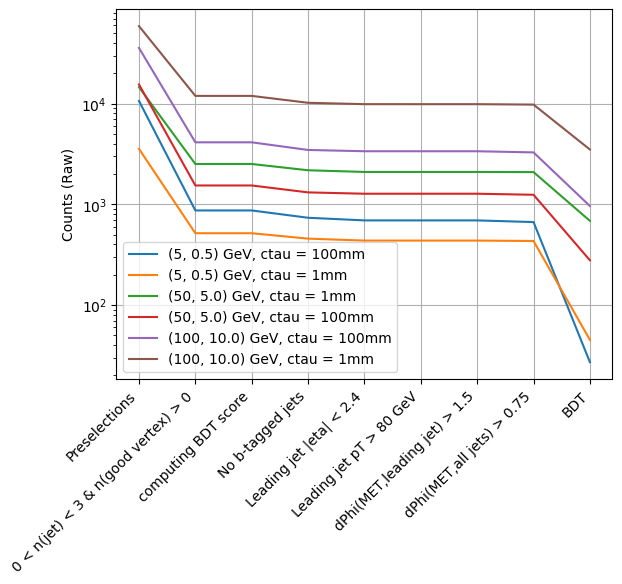

In [127]:
m1s = [5, 50, 100]
deltas = [0.1]
ctaus = [1, 100]

utils.plot_signal_efficiency(sig_histo, raw_cutflow, m1s, deltas, ctaus, ylabel = 'Counts (Raw)')

In [128]:
outdir = './csv/Cutflow/EventCount_Raw/'
outname = f'SR_BDT_Signal_ctau-{int(ct)}_samples_EventCount_Raw'

df_to_save = df

save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/EventCount_Raw//SR_BDT_Signal_ctau-100_samples_EventCount_Raw.csv


In [129]:
ct = 10.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
#df.loc["Total"] = df.sum()

df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT,m1
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,31933,6128,6128,5202,5027,5025,5025,4904,2352,90
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,7516,1436,1436,1195,1163,1163,1163,1132,591,80
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,32183,5166,5166,4371,4224,4224,4224,4163,1772,90
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,9944,1589,1589,1360,1311,1311,1311,1300,520,80
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,10438,1868,1868,1588,1531,1530,1530,1494,704,70
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,10806,1670,1670,1437,1392,1392,1392,1370,573,70
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,11566,1683,1683,1445,1382,1381,1381,1364,523,60
sig_2018_Mchi-60p0_dMchi-20p0_ctau-10,7429,1311,1311,1104,1072,1072,1072,1014,535,50
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,3168,344,344,286,271,270,270,254,57,5
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5002,479,479,397,371,371,371,361,46,5


In [130]:
outdir = './csv/Cutflow/EventCount_Raw/'
outname = f'SR_BDT_Signal_ctau-{int(ct)}_samples_EventCount_Raw'

df_to_save = df

save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/EventCount_Raw//SR_BDT_Signal_ctau-10_samples_EventCount_Raw.csv


In [131]:
ct = 100.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
#df.loc["Total"] = df.sum()

df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT,m1
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,23255,2803,2803,2364,2281,2280,2280,2173,696,90
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,25608,2813,2813,2386,2326,2326,2326,2261,625,90
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,10603,1240,1240,1062,1023,1022,1022,972,320,80
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,8905,989,989,834,808,807,807,782,212,80
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,7894,873,873,731,696,696,696,666,204,70
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,9055,957,957,810,783,783,783,757,184,70
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,7990,771,771,650,617,617,617,600,147,60
sig_2018_Mchi-60p0_dMchi-20p0_ctau-100,5452,602,602,511,498,498,498,457,144,50
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,2177,190,190,165,155,155,155,147,13,5
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,10655,869,869,735,692,692,692,666,27,5


In [132]:
outdir = './csv/Cutflow/EventCount_Raw/'
outname = f'SR_BDT_Signal_ctau-{int(ct)}_samples_EventCount_Raw'

df_to_save = df

save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/EventCount_Raw//SR_BDT_Signal_ctau-100_samples_EventCount_Raw.csv


## S/sqrt(B)

In [135]:
nBkg

11.847380097408053

In [137]:
count_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

table = count_cutflow

In [147]:
pd.options.display.float_format = '{:,.4f}'.format

In [148]:
s_over_b_cutflow = count_cutflow/np.sqrt(bkg_cts_df.loc['Total'])
s_over_b_cutflow

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,0.0005,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0030
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,0.0160,0.0066,0.0066,0.0062,0.0062,0.0062,0.0062,0.0065,0.0748
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,0.0785,0.0695,0.0695,0.0653,0.0645,0.0645,0.0645,0.0680,1.1124
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,0.0073,0.0052,0.0052,0.0049,0.0049,0.0049,0.0049,0.0051,0.1022
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,0.0094,0.0067,0.0067,0.0062,0.0062,0.0062,0.0062,0.0064,0.1405
...,...,...,...,...,...,...,...,...,...
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,5.4642,2.2770,2.2770,2.1625,2.0926,2.0944,2.0947,2.1766,21.9126
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,59.9305,33.1857,33.1857,31.7661,30.2089,30.2004,30.2047,32.0618,263.4247
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,0.0123,0.0053,0.0053,0.0050,0.0049,0.0049,0.0049,0.0051,0.0630
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,0.1736,0.1099,0.1099,0.1051,0.1043,0.1044,0.1044,0.1100,1.9500


In [149]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut

m1_list = []
delta_list = []
ctau_list = []

for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1_list.append(sig_dict['m1'])
    delta_list.append(sig_dict['delta'])
    ctau_list.append(sig_dict['ctau'])

df['m1'] = m1_list
df['delta'] = delta_list
df['ctau'] = ctau_list

df = df.sort_values(by=['m1']) # sort by m1

In [150]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [151]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df

,Signal,m1,delta,ctau,Background
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,1.1241,5.0000,0.1000,100.0000,11.8474
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,3.8092,5.0000,0.2000,10.0000,11.8474
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,56.0058,5.0000,0.1000,10.0000,11.8474
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,789.2052,5.0000,0.1000,1.0000,11.8474
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,71.6274,5.0000,0.2000,1.0000,11.8474
...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,0.2719,100.0000,0.2000,10.0000,11.8474
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,2.7066,100.0000,0.2000,1.0000,11.8474
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,0.2167,100.0000,0.1000,100.0000,11.8474
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,6.7120,100.0000,0.1000,10.0000,11.8474


In [152]:
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]
df

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0000,0.1000,100.0000,1.1241,11.8474,0.3266
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0000,0.2000,10.0000,3.8092,11.8474,1.1067
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0000,0.1000,10.0000,56.0058,11.8474,16.2713
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0000,0.1000,1.0000,789.2052,11.8474,229.2866
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0000,0.2000,1.0000,71.6274,11.8474,20.8098
...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,100.0000,0.2000,10.0000,0.2719,11.8474,0.0790
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,100.0000,0.2000,1.0000,2.7066,11.8474,0.7864
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,100.0000,0.1000,100.0000,0.2167,11.8474,0.0630
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,100.0000,0.1000,10.0000,6.7120,11.8474,1.9500


In [153]:
outdir = './csv/SR_Yields/'
outname = f'SR_BDT_S_over_B'

df_to_save = df

save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/SR_Yields//SR_BDT_S_over_B.csv


### ctau = 1mm signal points

In [154]:
ct = 1.0

In [155]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0,0.1,1.0,789.2052,11.8474,229.2866
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.0,0.1,1.0,906.7086,11.8474,263.4247
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,20.0,0.1,1.0,889.8116,11.8474,258.5157
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1,30.0,0.1,1.0,"1,119.3266",11.8474,325.1963
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1,40.0,0.1,1.0,671.6497,11.8474,195.1334
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,50.0,0.1,1.0,307.7940,11.8474,89.4230
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,60.0,0.1,1.0,199.2071,11.8474,57.8753
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,70.0,0.1,1.0,150.0453,11.8474,43.5924
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,80.0,0.1,1.0,118.8468,11.8474,34.5284
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,90.0,0.1,1.0,94.6572,11.8474,27.5006


In [156]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0,0.2,1.0,71.6274,11.8474,20.8098
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,10.0,0.2,1.0,48.0122,11.8474,13.9489
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1,20.0,0.2,1.0,52.5772,11.8474,15.2752
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1,30.0,0.2,1.0,"3,335.3689",11.8474,969.0199
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1,40.0,0.2,1.0,34.2453,11.8474,9.9492
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,50.0,0.2,1.0,18.0909,11.8474,5.2559
65,60.0,0.2,1.0,0.0000,11.8474,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,70.0,0.2,1.0,7.3948,11.8474,2.1484
68,80.0,0.2,1.0,0.0000,11.8474,0.0000
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,90.0,0.2,1.0,3.8287,11.8474,1.1124


### ctau = 10mm signal points

In [157]:
ct = 10.0

In [158]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 10mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0,0.1,10.0,56.0058,11.8474,16.2713
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,10.0,0.1,10.0,75.4234,11.8474,21.9126
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,20.0,0.1,10.0,83.1581,11.8474,24.1598
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,30.0,0.1,10.0,"1,085.1161",11.8474,315.2572
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,40.0,0.1,10.0,65.3878,11.8474,18.9970
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,50.0,0.1,10.0,27.9366,11.8474,8.1164
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,60.0,0.1,10.0,17.6468,11.8474,5.1269
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,70.0,0.1,10.0,14.2052,11.8474,4.1270
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,80.0,0.1,10.0,10.3226,11.8474,2.9990
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,90.0,0.1,10.0,8.1435,11.8474,2.3659


In [159]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 10mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0,0.2,10.0,3.8092,11.8474,1.1067
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,10.0,0.2,10.0,3.1957,11.8474,0.9285
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,20.0,0.2,10.0,3.7917,11.8474,1.1016
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10,30.0,0.2,10.0,813.8296,11.8474,236.4407
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10,40.0,0.2,10.0,2.6924,11.8474,0.7822
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,50.0,0.2,10.0,1.3135,11.8474,0.3816
66,60.0,0.2,10.0,0.0000,11.8474,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,70.0,0.2,10.0,0.5698,11.8474,0.1655
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,80.0,0.2,10.0,0.4835,11.8474,0.1405
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,90.0,0.2,10.0,0.3519,11.8474,0.1022


### ctau = 100mm signal points

In [160]:
ct = 100.0

In [161]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 100mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0,0.1,100.0,1.1241,11.8474,0.3266
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,10.0,0.1,100.0,1.4479,11.8474,0.4207
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,20.0,0.1,100.0,1.8642,11.8474,0.5416
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,30.0,0.1,100.0,285.1472,11.8474,82.8434
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,40.0,0.1,100.0,1.7571,11.8474,0.5105
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,50.0,0.1,100.0,0.7834,11.8474,0.2276
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,60.0,0.1,100.0,0.5000,11.8474,0.1453
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,70.0,0.1,100.0,0.3962,11.8474,0.1151
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,80.0,0.1,100.0,0.3327,11.8474,0.0967
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,90.0,0.1,100.0,0.2574,11.8474,0.0748


In [162]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 100mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,5.0,0.2,100.0,0.0852,11.8474,0.0248
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,10.0,0.2,100.0,0.0572,11.8474,0.0166
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100,20.0,0.2,100.0,0.0896,11.8474,0.0260
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100,30.0,0.2,100.0,22.8768,11.8474,6.6464
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100,40.0,0.2,100.0,0.0675,11.8474,0.0196
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,50.0,0.2,100.0,0.0333,11.8474,0.0097
67,60.0,0.2,100.0,0.0000,11.8474,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,70.0,0.2,100.0,0.0156,11.8474,0.0045
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,80.0,0.2,100.0,0.0136,11.8474,0.0040
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,90.0,0.2,100.0,0.0102,11.8474,0.0030
